# classification of trash

this is a notebook detecated on finding out if a given trash is recyclable or not
(sur la branche Thomas)

### importation des modules

pour l'instant je fais avec keras

In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

### chargement des données

In [2]:
def load_data(dir_path):
    X=[]
    y=[]
    
    class_map = {'R': 0, 'O': 1}
    
    for label_folder in ['R', 'O']:
        label_path = os.path.join(dir_path, label_folder)
        for img_file in tqdm(os.listdir(label_path), desc=f"Loading {label_folder} images"):
            img_path = os.path.join(label_path, img_file)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((128, 128))
                X.append(np.array(img))
                y.append(class_map[label_folder])
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    X = np.array(X)
    y = np.array(y)
    return X, y

normalization of the data

In [3]:
X_train, y_train = load_data('DATASET/TRAIN')

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")

Loading R images:   0%|          | 0/9999 [00:00<?, ?it/s]

Loading O images: 100%|██████████| 12565/12565 [00:15<00:00, 816.58it/s]


Training data shape: (22564, 128, 128, 3), Labels shape: (22564,)


let us show the data a bit and prepare the data

In [4]:
print(f'Number of training samples: {len(X_train)}')
print(f'Number of classes: {len(np.unique(y_train))}')

Number of training samples: 22564
Number of classes: 2


In [5]:
print(X_train)

[[[[235 235 233]
   [235 235 233]
   [235 235 233]
   ...
   [234 235 230]
   [234 235 230]
   [234 235 230]]

  [[235 235 233]
   [235 235 233]
   [235 235 233]
   ...
   [234 235 230]
   [234 235 230]
   [234 235 230]]

  [[235 235 233]
   [235 235 233]
   [235 235 233]
   ...
   [234 235 230]
   [234 235 230]
   [234 235 230]]

  ...

  [[224 173 142]
   [222 171 140]
   [219 168 137]
   ...
   [198 152 126]
   [205 159 133]
   [212 166 140]]

  [[222 171 140]
   [220 169 138]
   [217 166 135]
   ...
   [195 149 123]
   [203 157 131]
   [209 163 137]]

  [[221 170 139]
   [219 168 137]
   [217 166 135]
   ...
   [194 148 122]
   [201 155 129]
   [208 162 136]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [6]:
print(y_train)

[0 0 0 ... 1 1 1]


In [7]:
print(y_train[0:22564:1000])

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
print(y_train.ndim)

1


In [9]:
print(X_train[0].shape)
print(X_train[0])

(128, 128, 3)
[[[235 235 233]
  [235 235 233]
  [235 235 233]
  ...
  [234 235 230]
  [234 235 230]
  [234 235 230]]

 [[235 235 233]
  [235 235 233]
  [235 235 233]
  ...
  [234 235 230]
  [234 235 230]
  [234 235 230]]

 [[235 235 233]
  [235 235 233]
  [235 235 233]
  ...
  [234 235 230]
  [234 235 230]
  [234 235 230]]

 ...

 [[224 173 142]
  [222 171 140]
  [219 168 137]
  ...
  [198 152 126]
  [205 159 133]
  [212 166 140]]

 [[222 171 140]
  [220 169 138]
  [217 166 135]
  ...
  [195 149 123]
  [203 157 131]
  [209 163 137]]

 [[221 170 139]
  [219 168 137]
  [217 166 135]
  ...
  [194 148 122]
  [201 155 129]
  [208 162 136]]]


In [10]:
X_train = X_train.astype('float32') / 255.0
print(X_train[0])

[[[0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  ...
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]]

 [[0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  ...
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]]

 [[0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  [0.92156863 0.92156863 0.9137255 ]
  ...
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]
  [0.91764706 0.92156863 0.9019608 ]]

 ...

 [[0.8784314  0.6784314  0.5568628 ]
  [0.87058824 0.67058825 0.54901963]
  [0.85882354 0.65882355 0.5372549 ]
  ...
  [0.7764706  0.59607846 0.49411765]
  [0.8039216  0.62352943 0.52156866]
  [0.83137256 0.6509804  0.54901963]]

 [[0.87058824 0.67058825 0.54901963]
  [0.8627451  0.6627451  0.5411765 ]


In [11]:
def show_image(X, y, index):
    classes = ['R', 'O']
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

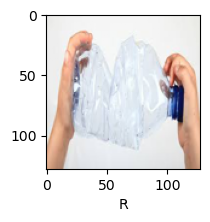

In [12]:
show_image(X_train, y_train, 0)

### Classyfing using CNN

without using dropout, batch_size so it may be prone to overfitting

In [13]:
classification_model = Sequential([
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((3,3)),
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((3,3)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

c:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
classification_model.compile(optimizer="adam",
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [15]:
classification_model.fit(X_train, y_train, epochs=15)

Epoch 1/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 95s 131ms/step - accuracy: 0.7766 - loss: 0.4861
Epoch 2/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.8427 - loss: 0.3695
Epoch 3/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.8646 - loss: 0.3348
Epoch 4/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 92s 130ms/step - accuracy: 0.8703 - loss: 0.3185
Epoch 5/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 95s 135ms/step - accuracy: 0.8800 - loss: 0.2979
Epoch 6/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.8923 - loss: 0.2671
Epoch 7/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.9038 - loss: 0.2436
Epoch 8/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.9200 - loss: 0.2178
Epoch 9/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.9226 - loss: 0.1961
Epoch 10/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 93s 132ms/step - accuracy: 0.9370 - loss: 0.1665
Epoch 11/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 94s 133ms/step - accuracy: 0.9438 - loss: 0.1543
Epoch 12/15
706/706

### let us test with our testing data

In [16]:
X_test, y_test = load_data('DATASET/TEST')

Loading O images: 100%|██████████| 1401/1401 [00:02<00:00, 629.24it/s]


In [17]:
print(f"Training data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (2513, 128, 128, 3), Labels shape: (2513,)


In [18]:
print(X_test[0].shape)
print(X_test[0])

(128, 128, 3)
[[[131  55  51]
  [121 109  86]
  [182 166 150]
  ...
  [170 174 151]
  [137 126 102]
  [120  70  56]]

 [[131  31  33]
  [105  60  46]
  [132 112  96]
  ...
  [141 131 111]
  [115  67  55]
  [126  49  43]]

 [[ 84  11   9]
  [130  55  50]
  [ 82  58  40]
  ...
  [ 90  60  44]
  [123  66  54]
  [ 95   9   8]]

 ...

 [[128 119 102]
  [128 119 102]
  [129 120 103]
  ...
  [132 119 103]
  [131 118 102]
  [131 118 102]]

 [[127 118 100]
  [127 118 101]
  [128 119 102]
  ...
  [130 118 102]
  [129 117 101]
  [129 117 101]]

 [[126 118  99]
  [126 118  99]
  [127 119 100]
  ...
  [127 118 101]
  [126 117 100]
  [126 117 100]]]


In [19]:
print(y_test.shape)
print(y_test[0:22564:1000])
print(y_test.ndim)

(2513,)
[0 0 1]
1


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classification_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


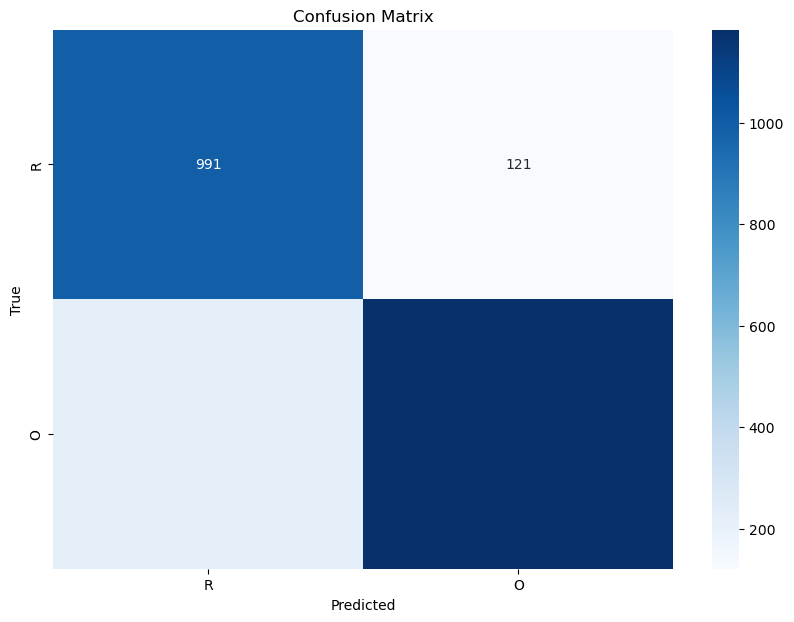

              precision    recall  f1-score   support

           R       0.82      0.89      0.85      1112
           O       0.91      0.84      0.87      1401

    accuracy                           0.87      2513
   macro avg       0.86      0.87      0.86      2513
weighted avg       0.87      0.87      0.87      2513



In [21]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['R', 'O'], yticklabels=['R', 'O'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=['R', 'O']))

In [22]:
eval = classification_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval[0]}, Test Accuracy: {eval[1]}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9071 - loss: 41.0842
Test Loss: 72.52112579345703, Test Accuracy: 0.8651014566421509


In [23]:
print(f"the accuracy of the model is: {eval[1] * 100:.2f}%")

the accuracy of the model is: 86.51%
